### Nama : Zahrani Cahya Priesa
### NIM : 1103223074
### Mata Kuliah : Machine Learning

In [1]:
# ============================================
# Import Libraries & TensorFlow Setup
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Scikit-learn utilities
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("=" * 60)
print("TENSORFLOW & KERAS SETUP")
print("=" * 60)
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# Check GPU details
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\nGPU Detected:")
    for gpu in gpus:
        print(f"  • {gpu.name} ({gpu.device_type})")
else:
    print("\nRunning on CPU")

print("\n✅ Libraries imported successfully!")

TENSORFLOW & KERAS SETUP
TensorFlow version: 2.18.0
GPU Available: False

Running on CPU

✅ Libraries imported successfully!


In [2]:
# ============================================
# Loading Fashion MNIST Dataset
# ============================================

print("\n" + "=" * 60)
print("FASHION MNIST DATASET")
print("=" * 60)

# Load Fashion MNIST (built-in Keras dataset)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("\nDataset Information:")
print(f"  Training set shape: {X_train_full.shape}")
print(f"  Training labels shape: {y_train_full.shape}")
print(f"  Test set shape: {X_test.shape}")
print(f"  Test labels shape: {y_test.shape}")

print(f"\nImage Specifications:")
print(f"  Image size: 28x28 pixels")
print(f"  Pixel values: {X_train_full.min()} to {X_train_full.max()}")
print(f"  Data type: {X_train_full.dtype}")

# Class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"\nClasses ({len(class_names)} categories):")
for i, name in enumerate(class_names):
    count = np.sum(y_train_full == i)
    print(f"  {i}: {name:<15} ({count:,} samples)")

print("\n✅ Fashion MNIST loaded successfully!")


FASHION MNIST DATASET
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 50s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 7s 2us/step

Dataset Information:
  Training set shape: (60000, 28, 28)
  Training labels shape: (60000,)
  Test set shape: (10000, 28, 28)
  Test labels shape: (10000,)

Image Specifications:
  Image size: 28x28 pixels
  Pixel values: 0 to 255
  Data type: uint8

Classes (10 categories):
  0: T-shirt/top     (6,000 samples)
  1: Trouser         (6,000 samples)
  2: Pullover        (6,000 samples)
  3: Dress           (6,000 samples)
  4: Coat            (6,000 samples)
  5: Sandal          (6,000 samples)
  6: Shirt           (6,000 samples)
  7: Sneaker         (6,000 samples)
  8: Bag             (6,000 samples)
  9: Ankle boot      (6,000 samples)

✅ Fashion MNIST loaded successfully!



SAMPLE VISUALIZATION


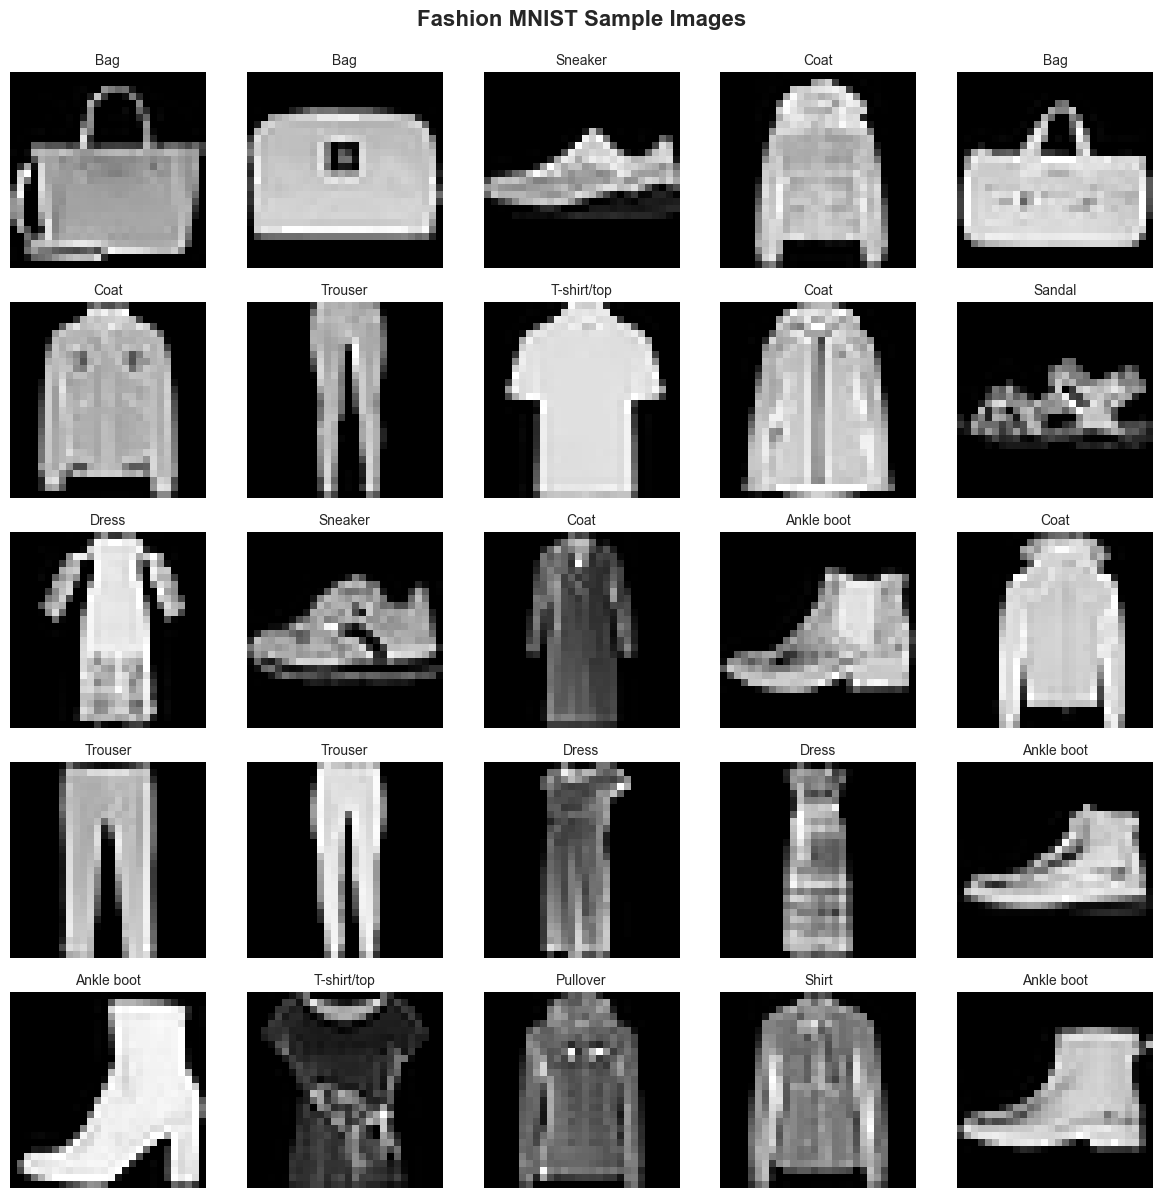

✅ Sample images displayed!


In [3]:
# ============================================
# Visualizing Sample Images
# ============================================

print("\n" + "=" * 60)
print("SAMPLE VISUALIZATION")
print("=" * 60)

# Plot 25 sample images
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

np.random.seed(42)
sample_indices = np.random.choice(len(X_train_full), 25, replace=False)

for i, idx in enumerate(sample_indices):
    axes[i].imshow(X_train_full[idx], cmap='gray')
    axes[i].set_title(f'{class_names[y_train_full[idx]]}', fontsize=10)
    axes[i].axis('off')

plt.suptitle('Fashion MNIST Sample Images', fontsize=16, weight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Sample images displayed!")

In [4]:
# ============================================
# Data Preprocessing
# ============================================

print("\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Split training data into train and validation sets
X_valid, y_valid = X_train_full[:5000], y_train_full[:5000]
X_train, y_train = X_train_full[5000:], y_train_full[5000:]

print(f"\nData Split:")
print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"  Validation set: {X_valid.shape[0]:,} samples")
print(f"  Test set: {X_test.shape[0]:,} samples")

# Scale pixel values to [0, 1] range
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

print(f"\nScaling:")
print(f"  Original range: [0, 255]")
print(f"  Scaled range: [{X_train.min():.1f}, {X_train.max():.1f}]")

print("\nFinal Shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_valid: {X_valid.shape}")
print(f"  X_test: {X_test.shape}")

print("\n✅ Data preprocessing completed!")


DATA PREPROCESSING

Data Split:
  Training set: 55,000 samples
  Validation set: 5,000 samples
  Test set: 10,000 samples

Scaling:
  Original range: [0, 255]
  Scaled range: [0.0, 1.0]

Final Shapes:
  X_train: (55000, 28, 28)
  X_valid: (5000, 28, 28)
  X_test: (10000, 28, 28)

✅ Data preprocessing completed!


In [6]:
# ============================================
# Building MLP Classifier (Sequential API)
# ============================================

print("\n" + "=" * 60)
print("BUILDING MLP WITH SEQUENTIAL API")
print("=" * 60)

# Create Sequential model
model = keras.Sequential([
    # Input layer (Flatten 28x28 to 784)
    layers.Flatten(input_shape=[28, 28]),
    
    # Hidden layer 1
    layers.Dense(300, activation="relu", name="hidden1"),
    
    # Hidden layer 2
    layers.Dense(100, activation="relu", name="hidden2"),
    
    # Output layer (10 classes)
    layers.Dense(10, activation="softmax", name="output")
], name="fashion_mnist_mlp")

print("\nModel Architecture:")
print("-" * 60)

# Model summary
model.summary()

# Count parameters
print(f"\nParameter Count:")
print(f"  Input → Hidden1: (784 × 300) + 300 = {784*300 + 300:,}")
print(f"  Hidden1 → Hidden2: (300 × 100) + 100 = {300*100 + 100:,}")
print(f"  Hidden2 → Output: (100 × 10) + 10 = {100*10 + 10:,}")
print(f"  TOTAL TRAINABLE PARAMETERS: {model.count_params():,}")

print("\n✅ Model built successfully!")


BUILDING MLP WITH SEQUENTIAL API

Model Architecture:
------------------------------------------------------------


Model: "fashion_mnist_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)


Parameter Count:
  Input → Hidden1: (784 × 300) + 300 = 235,500
  Hidden1 → Hidden2: (300 × 100) + 100 = 30,100
  Hidden2 → Output: (100 × 10) + 10 = 1,010
  TOTAL TRAINABLE PARAMETERS: 266,610

✅ Model built successfully!


In [7]:
# ============================================
# Model Compilation
# ============================================

print("\n" + "=" * 60)
print("MODEL COMPILATION")
print("=" * 60)

# Compile model
model.compile(
    loss="sparse_categorical_crossentropy",  # For integer labels
    optimizer="sgd",                          # Stochastic Gradient Descent
    metrics=["accuracy"]                      # Track accuracy
)

print("\nCompilation Settings:")
print("-" * 60)
print("  Loss Function: Sparse Categorical Crossentropy")
print("    → Used for multi-class classification with integer labels")
print("    → Formula: -log(p_true_class)")
print("\n  Optimizer: SGD (Stochastic Gradient Descent)")
print("    → Default learning rate: 0.01")
print("    → Updates weights using mini-batch gradients")
print("\n  Metrics: Accuracy")
print("    → Percentage of correct predictions")

print("\n✅ Model compiled successfully!")


MODEL COMPILATION

Compilation Settings:
------------------------------------------------------------
  Loss Function: Sparse Categorical Crossentropy
    → Used for multi-class classification with integer labels
    → Formula: -log(p_true_class)

  Optimizer: SGD (Stochastic Gradient Descent)
    → Default learning rate: 0.01
    → Updates weights using mini-batch gradients

  Metrics: Accuracy
    → Percentage of correct predictions

✅ Model compiled successfully!


In [8]:
# ============================================
# Training the Model
# ============================================

print("\n" + "=" * 60)
print("MODEL TRAINING")
print("=" * 60)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    verbose=1  # Show progress bar
)

print("\n✅ Training completed!")


MODEL TRAINING
Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6791 - loss: 0.9932 - val_accuracy: 0.8204 - val_loss: 0.5211
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8248 - loss: 0.5010 - val_accuracy: 0.8434 - val_loss: 0.4553
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8406 - loss: 0.4476 - val_accuracy: 0.8546 - val_loss: 0.4237
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8506 - loss: 0.4178 - val_accuracy: 0.8614 - val_loss: 0.4029
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8589 - loss: 0.3967 - val_accuracy: 0.8652 - val_loss: 0.3871
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8654 - loss: 0.3797 - val_accuracy: 0.8692 - val_loss: 0.3750
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8688 - loss: 0.3661 - val_accuracy: 0.8712 - val_loss: 0.3652
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8727 -


TRAINING HISTORY VISUALIZATION


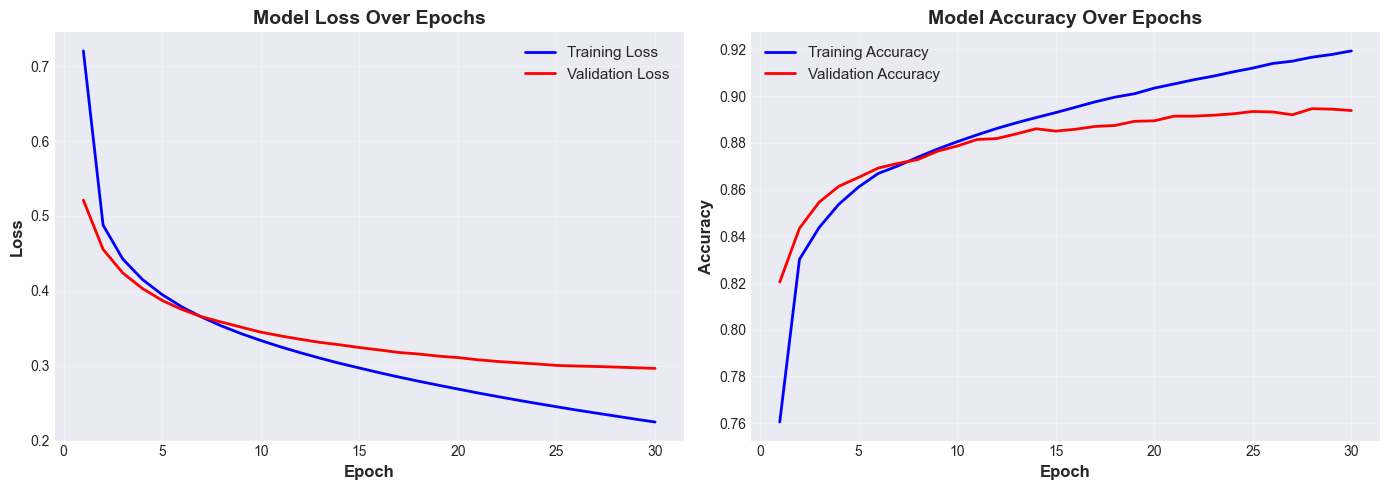


Final Training Metrics:
  Training Loss: 0.2246
  Training Accuracy: 91.93%
  Validation Loss: 0.2963
  Validation Accuracy: 89.38%

✅ Training history visualized!


In [9]:
# ============================================
# Visualizing Training History
# ============================================

print("\n" + "=" * 60)
print("TRAINING HISTORY VISUALIZATION")
print("=" * 60)

# Extract history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(train_loss) + 1)

# Plot training curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss curves
axes[0].plot(epochs_range, train_loss, 'b-', linewidth=2, label='Training Loss')
axes[0].plot(epochs_range, val_loss, 'r-', linewidth=2, label='Validation Loss')
axes[0].set_xlabel('Epoch', fontsize=12, weight='bold')
axes[0].set_ylabel('Loss', fontsize=12, weight='bold')
axes[0].set_title('Model Loss Over Epochs', fontsize=14, weight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Accuracy curves
axes[1].plot(epochs_range, train_acc, 'b-', linewidth=2, label='Training Accuracy')
axes[1].plot(epochs_range, val_acc, 'r-', linewidth=2, label='Validation Accuracy')
axes[1].set_xlabel('Epoch', fontsize=12, weight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, weight='bold')
axes[1].set_title('Model Accuracy Over Epochs', fontsize=14, weight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Training Metrics:")
print(f"  Training Loss: {train_loss[-1]:.4f}")
print(f"  Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"  Validation Loss: {val_loss[-1]:.4f}")
print(f"  Validation Accuracy: {val_acc[-1]*100:.2f}%")

print("\n✅ Training history visualized!")

In [10]:
# ============================================
# Model Evaluation on Test Set
# ============================================

print("\n" + "=" * 60)
print("MODEL EVALUATION - TEST SET")
print("=" * 60)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Set Performance:")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Test Accuracy: {test_accuracy*100:.2f}%")

# Make predictions
y_pred_proba = model.predict(X_test[:10], verbose=0)  # First 10 samples
y_pred_classes = np.argmax(y_pred_proba, axis=1)

print(f"\nSample Predictions (First 10 images):")
print("-" * 60)
print(f"{'True Label':<20} {'Predicted':<20} {'Confidence':<15}")
print("-" * 60)

for i in range(10):
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_pred_classes[i]]
    confidence = y_pred_proba[i][y_pred_classes[i]] * 100
    
    status = "✅" if y_test[i] == y_pred_classes[i] else "❌"
    print(f"{true_label:<20} {pred_label:<20} {confidence:>6.2f}%  {status}")

print("\n✅ Model evaluation completed!")


MODEL EVALUATION - TEST SET

Test Set Performance:
  Test Loss: 0.3349
  Test Accuracy: 88.06%

Sample Predictions (First 10 images):
------------------------------------------------------------
True Label           Predicted            Confidence     
------------------------------------------------------------
Ankle boot           Ankle boot            96.65%  ✅
Pullover             Pullover              99.58%  ✅
Trouser              Trouser              100.00%  ✅
Trouser              Trouser              100.00%  ✅
Shirt                Shirt                 89.10%  ✅
Trouser              Trouser               99.98%  ✅
Coat                 Coat                  98.90%  ✅
Shirt                Shirt                 93.18%  ✅
Sandal               Sandal                99.28%  ✅
Sneaker              Sneaker               99.85%  ✅

✅ Model evaluation completed!



PREDICTION VISUALIZATION


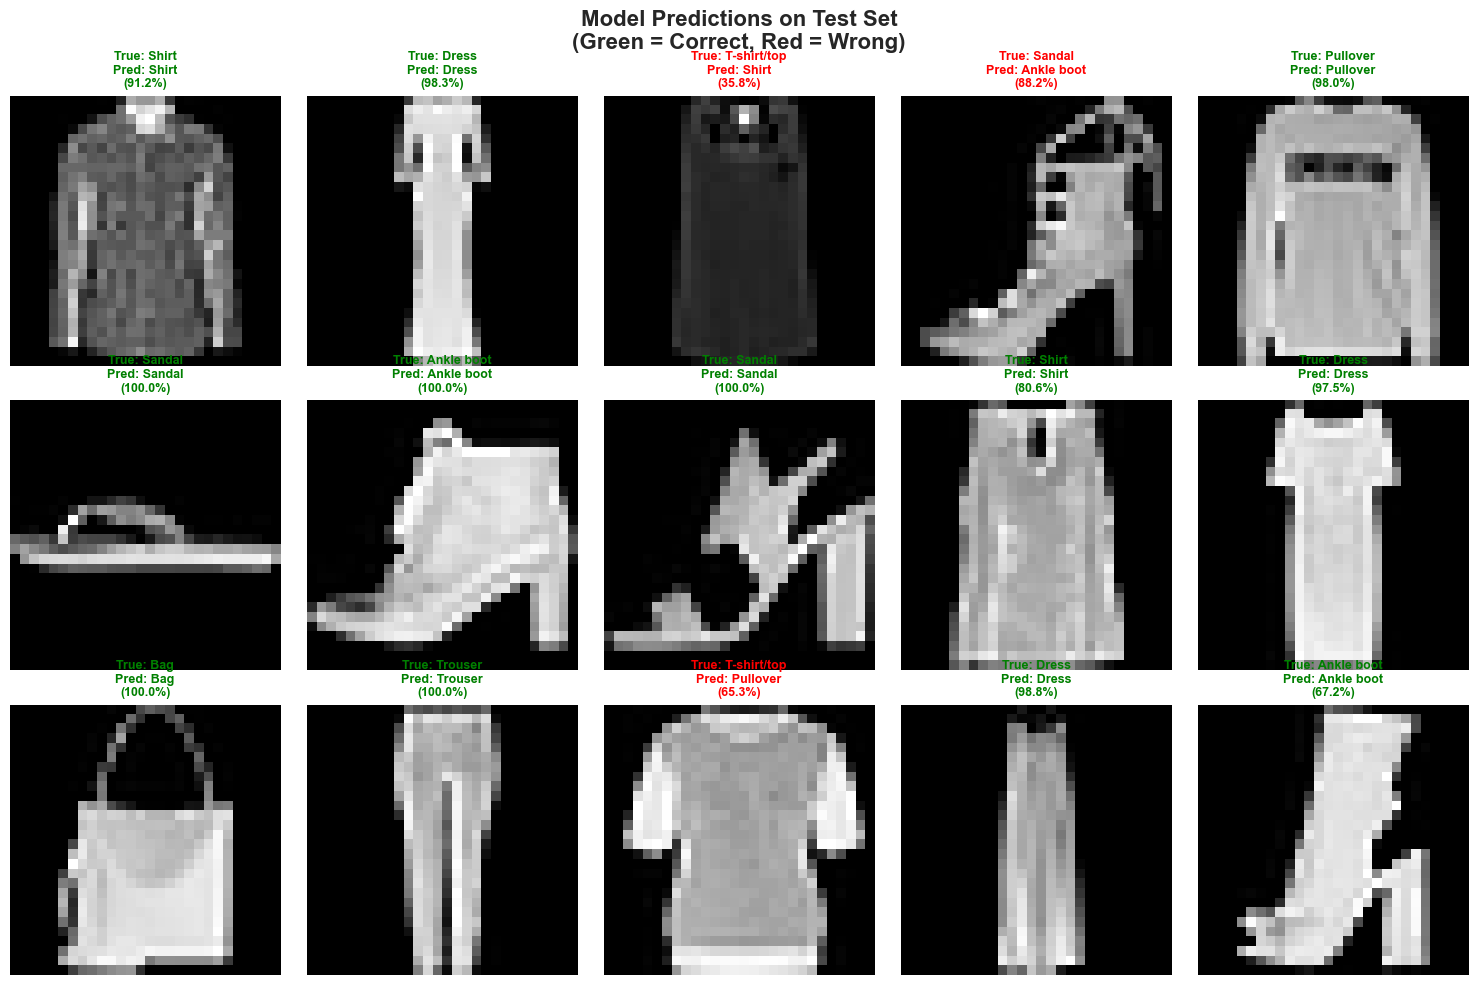

✅ Predictions visualized!


In [11]:
# ============================================
# Visualizing Model Predictions
# ============================================

print("\n" + "=" * 60)
print("PREDICTION VISUALIZATION")
print("=" * 60)

# Select random test samples
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 15, replace=False)

# Get predictions for samples
sample_predictions = model.predict(X_test[sample_indices], verbose=0)
sample_pred_classes = np.argmax(sample_predictions, axis=1)

# Plot predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.ravel()

for i, idx in enumerate(sample_indices):
    # Plot image
    axes[i].imshow(X_test[idx], cmap='gray')
    
    # Get true and predicted labels
    true_label = class_names[y_test[idx]]
    pred_label = class_names[sample_pred_classes[i]]
    confidence = sample_predictions[i][sample_pred_classes[i]] * 100
    
    # Color: green if correct, red if wrong
    color = 'green' if y_test[idx] == sample_pred_classes[i] else 'red'
    
    # Title
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\n({confidence:.1f}%)', 
                     fontsize=9, color=color, weight='bold')
    axes[i].axis('off')

plt.suptitle('Model Predictions on Test Set\n(Green = Correct, Red = Wrong)', 
             fontsize=16, weight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("✅ Predictions visualized!")

In [12]:
# ============================================
# Create Synthetic Housing Dataset
# ============================================

print("\n" + "=" * 60)
print("REGRESSION MLP - SYNTHETIC HOUSING DATASET")
print("=" * 60)

# Create synthetic housing data
np.random.seed(42)
n_samples = 20640  # Same size as California Housing

# Generate synthetic features
X_housing = np.random.randn(n_samples, 8)

# Feature names (same as California Housing)
feature_names = [
    'MedInc',      # Median income
    'HouseAge',    # House age
    'AveRooms',    # Average rooms
    'AveBedrms',   # Average bedrooms
    'Population',  # Population
    'AveOccup',    # Average occupancy
    'Latitude',    # Latitude
    'Longitude'    # Longitude
]

# Generate target (house prices) with realistic relationship
# Price influenced by: income (+), age (-), rooms (+), etc.
y_housing = (
    3.0 * X_housing[:, 0] +      # Income effect (strong positive)
    -0.5 * X_housing[:, 1] +     # Age effect (negative)
    1.5 * X_housing[:, 2] +      # Rooms effect (positive)
    -1.0 * X_housing[:, 3] +     # Bedrooms effect (negative)
    0.3 * X_housing[:, 4] +      # Population (small effect)
    np.random.randn(n_samples) * 0.5  # Random noise
)

# Rescale to realistic house prices (in $100,000s)
y_housing = (y_housing - y_housing.min()) / (y_housing.max() - y_housing.min()) * 4 + 0.5

# Create DataFrame
df_housing = pd.DataFrame(X_housing, columns=feature_names)
df_housing['Price'] = y_housing

print("\nDataset Information:")
print(f"  Total samples: {len(df_housing):,}")
print(f"  Features: {len(feature_names)}")
print(f"  Target: House price (in $100,000s)")

print("\nFeatures:")
for i, feature in enumerate(feature_names):
    print(f"  {i+1}. {feature}")

print("\nPrice Statistics:")
print(df_housing['Price'].describe())

print("\n✅ Synthetic housing dataset created!")


REGRESSION MLP - SYNTHETIC HOUSING DATASET

Dataset Information:
  Total samples: 20,640
  Features: 8
  Target: House price (in $100,000s)

Features:
  1. MedInc
  2. HouseAge
  3. AveRooms
  4. AveBedrms
  5. Population
  6. AveOccup
  7. Latitude
  8. Longitude

Price Statistics:
count    20640.000000
mean         2.406340
std          0.537832
min          0.500000
25%          2.044792
50%          2.405127
75%          2.768480
max          4.500000
Name: Price, dtype: float64

✅ Synthetic housing dataset created!


In [13]:
# ============================================
# Data Preprocessing for Regression
# ============================================

print("\n" + "=" * 60)
print("DATA PREPROCESSING - REGRESSION")
print("=" * 60)

# Split data
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print(f"\nData Split:")
print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"  Validation set: {X_valid.shape[0]:,} samples")
print(f"  Test set: {X_test.shape[0]:,} samples")

# Feature scaling (IMPORTANT for regression!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature Scaling Applied:")
print(f"  Method: StandardScaler (Z-score normalization)")
print(f"  Formula: z = (x - μ) / σ")
print(f"\n  Original range example (MedInc):")
print(f"    Before: [{X_train[:, 0].min():.2f}, {X_train[:, 0].max():.2f}]")
print(f"    After: [{X_train_scaled[:, 0].min():.2f}, {X_train_scaled[:, 0].max():.2f}]")

print("\n✅ Data preprocessing completed!")


DATA PREPROCESSING - REGRESSION

Data Split:
  Training set: 13,209 samples
  Validation set: 3,303 samples
  Test set: 4,128 samples

Feature Scaling Applied:
  Method: StandardScaler (Z-score normalization)
  Formula: z = (x - μ) / σ

  Original range example (MedInc):
    Before: [-3.94, 3.69]
    After: [-3.95, 3.70]

✅ Data preprocessing completed!


In [14]:
# ============================================
# Building Regression MLP
# ============================================

print("\n" + "=" * 60)
print("BUILDING REGRESSION MLP")
print("=" * 60)

# Build regression model
model_reg = keras.Sequential([
    layers.Dense(30, activation="relu", input_shape=[8], name="hidden1"),
    layers.Dense(30, activation="relu", name="hidden2"),
    layers.Dense(1, name="output")  # NO activation for regression!
], name="housing_mlp")

print("\nRegression Model Architecture:")
print("-" * 60)

model_reg.summary()

print("\nKey Differences from Classification:")
print("-" * 60)
print("  1. OUTPUT LAYER:")
print("     • Classification: 10 neurons + softmax")
print("     • Regression: 1 neuron + NO activation")
print("\n  2. LOSS FUNCTION:")
print("     • Classification: sparse_categorical_crossentropy")
print("     • Regression: mean_squared_error (MSE)")
print("\n  3. OUTPUT RANGE:")
print("     • Classification: [0, 1] probabilities")
print("     • Regression: (-∞, +∞) continuous values")

print("\n✅ Regression model built!")


BUILDING REGRESSION MLP

Regression Model Architecture:
------------------------------------------------------------


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "housing_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)


Key Differences from Classification:
------------------------------------------------------------
  1. OUTPUT LAYER:
     • Classification: 10 neurons + softmax
     • Regression: 1 neuron + NO activation

  2. LOSS FUNCTION:
     • Classification: sparse_categorical_crossentropy
     • Regression: mean_squared_error (MSE)

  3. OUTPUT RANGE:
     • Classification: [0, 1] probabilities
     • Regression: (-∞, +∞) continuous values

✅ Regression model built!


In [15]:
# ============================================
# Compile & Train Regression Model
# ============================================

print("\n" + "=" * 60)
print("REGRESSION MODEL TRAINING")
print("=" * 60)

# Compile
model_reg.compile(
    loss="mean_squared_error",
    optimizer="sgd",
    metrics=["mae"]  # Mean Absolute Error
)

print("Compilation Settings:")
print(f"  Loss: Mean Squared Error (MSE)")
print(f"  Optimizer: SGD")
print(f"  Metrics: Mean Absolute Error (MAE)")

# Train
print("\nTraining started")
history_reg = model_reg.fit(
    X_train_scaled, y_train,
    epochs=20,
    validation_data=(X_valid_scaled, y_valid),
    verbose=1
)

print("\n✅ Regression training completed!")


REGRESSION MODEL TRAINING
Compilation Settings:
  Loss: Mean Squared Error (MSE)
  Optimizer: SGD
  Metrics: Mean Absolute Error (MAE)

Training started
Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5365 - mae: 0.4687 - val_loss: 0.0516 - val_mae: 0.1788
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0427 - mae: 0.1630 - val_loss: 0.0269 - val_mae: 0.1281
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0247 - mae: 0.1231 - val_loss: 0.0192 - val_mae: 0.1083
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0182 - mae: 0.1055 - val_loss: 0.0156 - val_mae: 0.0980
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0150 - mae: 0.0958 - val_loss: 0.0135 - val_mae: 0.0917
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131 - mae: 0.0898 - val_loss: 0.0122 - val_mae: 0.0874
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0119 - mae: 0.0858 - val_loss: 0.0113 - val_mae: 0.0843
Epoch 8/20
413/413 ━


REGRESSION MODEL EVALUATION

Test Set Performance:
  Mean Squared Error (MSE): 0.0081
  Mean Absolute Error (MAE): 0.0711
  Root Mean Squared Error (RMSE): 0.0900

Sample Predictions (First 10 houses):
------------------------------------------------------------
True Price      Predicted       Error          
------------------------------------------------------------
$     220,501  $     221,830  $       1,329
$     192,588  $     194,854  $       2,266
$     327,123  $     330,289  $       3,165
$     232,800  $     231,992  $         808
$     238,868  $     225,992  $      12,876
$     286,701  $     281,126  $       5,575
$     248,013  $     258,413  $      10,400
$     210,557  $     207,823  $       2,734
$     232,298  $     235,703  $       3,405
$     228,237  $     223,997  $       4,239


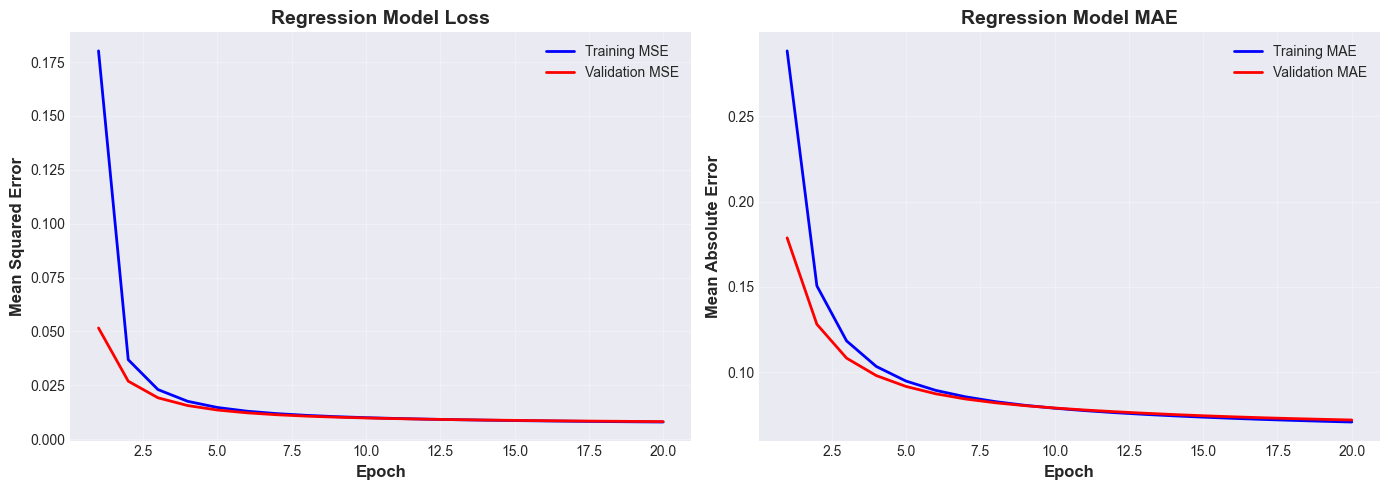


✅ Regression evaluation completed!


In [16]:
# ============================================
# Regression Model Evaluation
# ============================================

print("\n" + "=" * 60)
print("REGRESSION MODEL EVALUATION")
print("=" * 60)

# Evaluate on test set
mse_test, mae_test = model_reg.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\nTest Set Performance:")
print(f"  Mean Squared Error (MSE): {mse_test:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): {np.sqrt(mse_test):.4f}")

# Make predictions
y_pred = model_reg.predict(X_test_scaled[:10], verbose=0).flatten()

print(f"\nSample Predictions (First 10 houses):")
print("-" * 60)
print(f"{'True Price':<15} {'Predicted':<15} {'Error':<15}")
print("-" * 60)

for i in range(10):
    true_price = y_test[i] * 100000  # Convert back to dollars
    pred_price = y_pred[i] * 100000
    error = abs(true_price - pred_price)
    
    print(f"${true_price:>12,.0f}  ${pred_price:>12,.0f}  ${error:>12,.0f}")

# Visualize training curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
epochs_range = range(1, len(history_reg.history['loss']) + 1)
axes[0].plot(epochs_range, history_reg.history['loss'], 'b-', linewidth=2, label='Training MSE')
axes[0].plot(epochs_range, history_reg.history['val_loss'], 'r-', linewidth=2, label='Validation MSE')
axes[0].set_xlabel('Epoch', fontsize=12, weight='bold')
axes[0].set_ylabel('Mean Squared Error', fontsize=12, weight='bold')
axes[0].set_title('Regression Model Loss', fontsize=14, weight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE curve
axes[1].plot(epochs_range, history_reg.history['mae'], 'b-', linewidth=2, label='Training MAE')
axes[1].plot(epochs_range, history_reg.history['val_mae'], 'r-', linewidth=2, label='Validation MAE')
axes[1].set_xlabel('Epoch', fontsize=12, weight='bold')
axes[1].set_ylabel('Mean Absolute Error', fontsize=12, weight='bold')
axes[1].set_title('Regression Model MAE', fontsize=14, weight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Regression evaluation completed!")